# WeatherPy
----

#### Observations:

* Temperature tends to be higher in cities located near the equator, and lower in cities located far from the equator. The further a city is from the equator, the lower the temperature.

* Based on the scatter plot, it appears that humidity tends to be high in cities with latitudes between -20 degrees and 0 degrees, and between 60 degrees and 80 degrees. However, the correlation analysis did not reveal a correlation between humidity and latitude.

* Cloudiness and wind speed tend to vary greatly at all latitudes. The correlation analysis did not reveal any correlations between cloudiness and latitude, or between wind speed and latitude. 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data_output/cities_output.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [27]:
# Create lists to hold weather data for cities:

City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_temp = []
Wind_speed = []

# Build query url:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# Perform API calls to retrieve weather data for all cities:

for index, city in enumerate(cities):
    
    try:
        response = requests.get(query_url + city).json()
        
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_temp.append(response["main"]["temp_max"])
        Wind_speed.append(response["wind"]["speed"])
        City.append(city)
        
        print("Processing Record " + str(index) + " | " + city)
        
    except:  
        print("Could Not Process Record " + str(index) + " | " + "City not found")
        


Processing Record 0 | port elizabeth
Processing Record 1 | sandwick
Processing Record 2 | new norfolk
Processing Record 3 | chokwe
Processing Record 4 | muros
Processing Record 5 | lata
Processing Record 6 | lockhart
Processing Record 7 | blythe
Processing Record 8 | ribeira grande
Processing Record 9 | pangody
Processing Record 10 | hermanus
Processing Record 11 | kapaa
Processing Record 12 | longyearbyen
Could Not Process Record 13 | City not found
Processing Record 14 | coos bay
Processing Record 15 | clyde river
Processing Record 16 | kodiak
Processing Record 17 | yellowknife
Processing Record 18 | albany
Processing Record 19 | belvedere marittimo
Processing Record 20 | dikson
Processing Record 21 | port alfred
Processing Record 22 | bluff
Processing Record 23 | hamilton
Processing Record 24 | jamestown
Processing Record 25 | ketchikan
Processing Record 26 | aginskoye
Processing Record 27 | thunder bay
Processing Record 28 | kruisfontein
Could Not Process Record 29 | City not found

Processing Record 244 | ca mau
Processing Record 245 | atar
Processing Record 246 | aksarka
Processing Record 247 | channel-port aux basques
Processing Record 248 | tiksi
Processing Record 249 | togur
Processing Record 250 | los llanos de aridane
Could Not Process Record 251 | City not found
Processing Record 252 | ishigaki
Processing Record 253 | saldanha
Processing Record 254 | rio negrinho
Processing Record 255 | horbranz
Processing Record 256 | lensk
Processing Record 257 | sept-iles
Processing Record 258 | nador
Could Not Process Record 259 | City not found
Processing Record 260 | baykit
Processing Record 261 | kaeo
Processing Record 262 | ponta delgada
Processing Record 263 | coquimbo
Processing Record 264 | batagay-alyta
Processing Record 265 | san patricio
Processing Record 266 | bojnurd
Processing Record 267 | cedar city
Processing Record 268 | ostrovnoy
Processing Record 269 | tignere
Processing Record 270 | santa barbara
Processing Record 271 | hay river
Processing Record 27

Processing Record 484 | aleksandrov gay
Processing Record 485 | vostok
Processing Record 486 | dumingag
Processing Record 487 | tambovka
Processing Record 488 | nyaunglebin
Processing Record 489 | abatskoye
Processing Record 490 | sechura
Processing Record 491 | axim
Processing Record 492 | lipari
Processing Record 493 | homer
Processing Record 494 | saint-joseph
Processing Record 495 | quepos
Could Not Process Record 496 | City not found
Processing Record 497 | kenai
Processing Record 498 | balkanabat
Processing Record 499 | klaksvik
Processing Record 500 | portland
Processing Record 501 | misratah
Processing Record 502 | novikovo
Processing Record 503 | srikakulam
Processing Record 504 | gisborne
Processing Record 505 | broken hill
Could Not Process Record 506 | City not found
Processing Record 507 | moree
Processing Record 508 | olafsvik
Processing Record 509 | wagar
Processing Record 510 | nabire
Processing Record 511 | morondava
Processing Record 512 | erdenet
Processing Record 51

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
# Store city weather data in a dataframe:

city_weather_df = pd.DataFrame({
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max_temp": Max_temp,
    "Wind_speed": Wind_speed
})

city_weather_df

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0    port elizabeth          92      ZA  1586650267        63 -33.92   25.57   
1          sandwick         100      GB  1586650185        81  60.00   -1.25   
2       new norfolk          40      AU  1586650004        58 -42.78  147.06   
3            chokwe           0      MZ  1586650267        83 -24.53   32.98   
4             muros          90      ES  1586650267        93  42.78   -9.06   
..              ...         ...     ...         ...       ...    ...     ...   
554       orbottyan           8      HU  1586650313        52  47.69   19.28   
555  lakes entrance          86      AU  1586650313        73 -37.88  147.98   
556         borovsk          11      RU  1586650313        79  55.21   36.49   
557           tabou          99      CI  1586650313        82   4.42   -7.35   
558        bay city           1      US  1586650313        40  43.59  -83.89   

     Max_temp  Wind_speed  
0       62.60        5.82  
1       46.40       27.51  
2       55.99       19.46  
3       67.57        4.47  
4       55.00        4.70  
..        ...         ...  
554     50.00        2.24  
555     55.99        1.01  
556     28.40        6.71  
557     80.04        3.40  
558     54.00        6.93  

[559 rows x 9 columns]

In [30]:
# Export city weather data to a .csv file:

city_weather_df.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

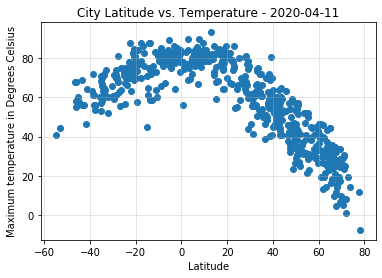

In [31]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Max_temp"])

today = date.today()
plt.xlabel("Latitude")
plt.ylabel("Maximum temperature in Degrees Celsius")
plt.title(f"City Latitude vs. Temperature - {today}")
plt.grid(alpha=0.4)

plt.savefig("data_output/Images/Lat_vs_Temp.png")
plt.show()

# Based on the plot below, temperature is higher in cities near the equator. The further a city is from the equator, the colder the temperature.

#### Latitude vs. Humidity Plot

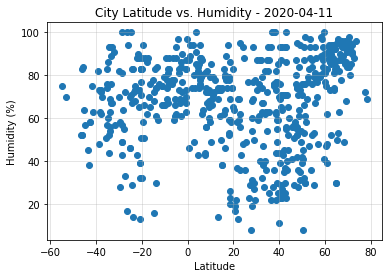

In [32]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity - {today}")
plt.grid(alpha=0.4)

plt.savefig("data_output/Images/Lat_vs_Humidity.png")
plt.show()

# Based on the plot below, cities with latitudes between -20 degrees and 0 degree all have relatively high humidity levels. 
# The same can be said of cities with latitudes between 60 degrees and 80 degrees. Other cities have high levels of variation in humidity levels.

#### Latitude vs. Cloudiness Plot

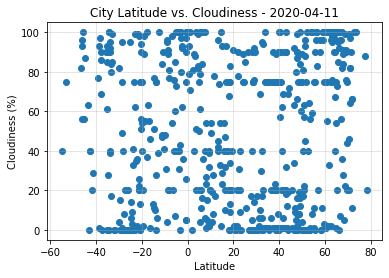

In [33]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness - {today}")
plt.grid(alpha=0.4)

plt.savefig("data_output/Images/Lat_vs_Cloudiness.png")
plt.show()

# According to the plot below, there are high levels of variation in cloudiness among all cities in the sample. 

#### Latitude vs. Wind Speed Plot

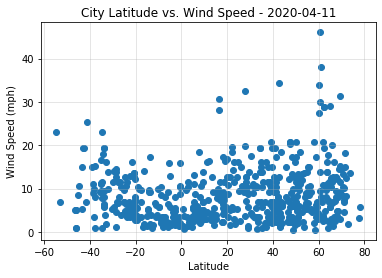

In [34]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind_speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed - {today}")
plt.grid(alpha=0.4)

plt.savefig("data_output/Images/Lat_vs_WindSpeed.png")
plt.show()

# According to the plot below, wind speed tends to vary greatly among all cities in the sample.

## Linear Regression

In [35]:
# Create a function to create Linear Regression plots:

def lin_regress(x_values, y_values, y_axis_label, hemisphere):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    
    plt.xlabel("City Latitude")
    plt.ylabel(y_axis_label)
    plt.grid(alpha=0.4)
    plt.title(f"{hemisphere} Hemisphere: City Latitude vs. {y_axis_label} - {today}")
    
    print(f"The r-squared is: {rvalue**2}")

In [36]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = city_weather_df.loc[city_weather_df["Lat"] >= 0]
southern_df = city_weather_df.loc[city_weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8242380845167979


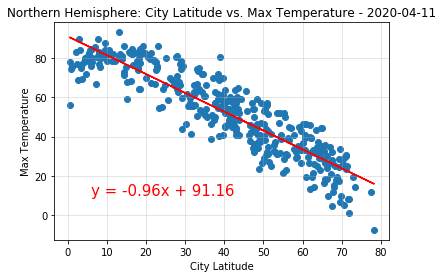

In [37]:
x_values = northern_df["Lat"]
y_values = northern_df["Max_temp"]
y_axis_label = "Max Temperature"
hemisphere = "Northern"

lin_regress(x_values, y_values, y_axis_label, hemisphere)

plt.savefig("data_output/Images/North_Lat_vs_Temp_LinRegress.png")
plt.show()

# Based on the linear regression plot below, there is a strong inverse correlation between city latitude and temperature in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48246437200188774


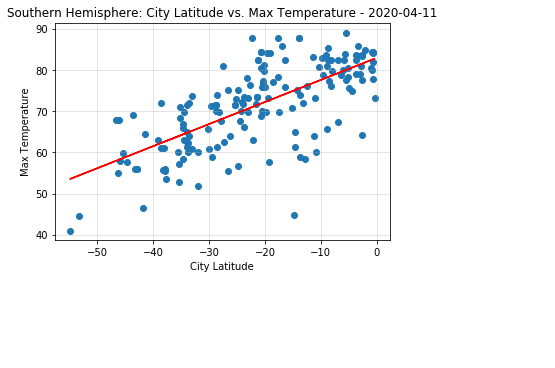

In [38]:
x_values = southern_df["Lat"]
y_values = southern_df["Max_temp"]
y_axis_label = "Max Temperature"
hemisphere = "Southern"

lin_regress(x_values, y_values, y_axis_label, hemisphere)

plt.savefig("data_output/Images/South_Lat_vs_Temp_LinRegress.png")
plt.show()

# Based on the linear regression plot below, there is a direct correlation between city latitude and temperature in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03801812615012337


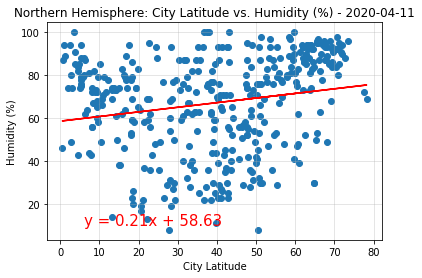

In [39]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
y_axis_label = "Humidity (%)"
hemisphere = "Northern"

lin_regress(x_values, y_values, y_axis_label, hemisphere)

plt.savefig("data_output/Images/North_Lat_vs_Humidity_LinRegress.png")
plt.show()

# Based on the linear regression plot below, there is no correlation between city latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.049986712659501054


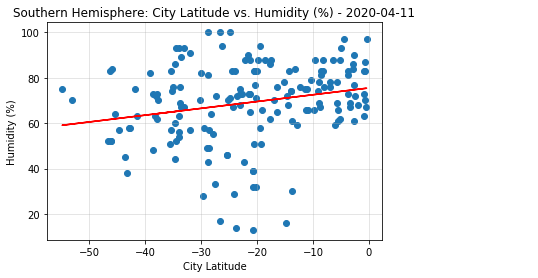

In [40]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
y_axis_label = "Humidity (%)"
hemisphere = "Southern"

lin_regress(x_values, y_values, y_axis_label, hemisphere)

plt.savefig("data_output/Images/South_Lat_vs_Humidity_LinRegress.png")
plt.show()

# Based on the linear regression plot below, there is no correlation between city latitude and humidity in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05266785155491008


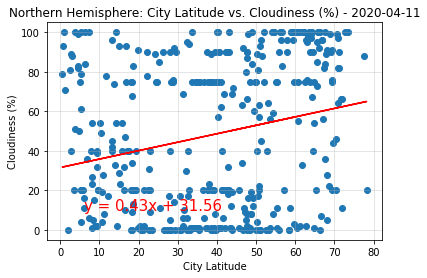

In [41]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
y_axis_label = "Cloudiness (%)"
hemisphere = "Northern"

lin_regress(x_values, y_values, y_axis_label, hemisphere)

plt.savefig("data_output/Images/North_Lat_vs_Cloudiness_LinRegress.png")
plt.show()

# Based on the linear regression plot below, there is no correlation between city latitude and cloudiness in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002273318986115207


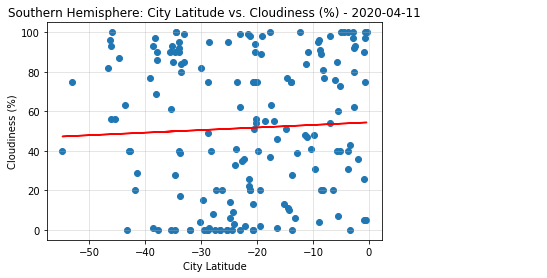

In [42]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
y_axis_label = "Cloudiness (%)"
hemisphere = "Southern"

lin_regress(x_values, y_values, y_axis_label, hemisphere)

plt.savefig("data_output/Images/South_Lat_vs_Cloudiness_LinRegress.png")
plt.show()

# Based on the linear regression plot below, there is no correlation between city latitude and cloudiness in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03474515712088459


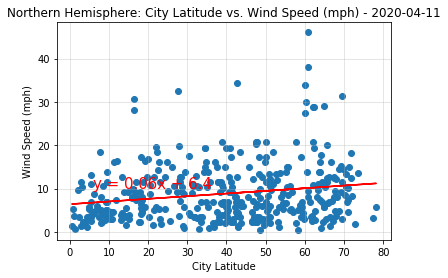

In [43]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind_speed"]
y_axis_label = "Wind Speed (mph)"
hemisphere = "Northern"

lin_regress(x_values, y_values, y_axis_label, hemisphere)

plt.savefig("data_output/Images/North_Lat_vs_WindSpeed_LinRegress.png")
plt.show()

# Based on the linear regression plot below, there is no correlation between city latitude and wind speed in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15176226998184034


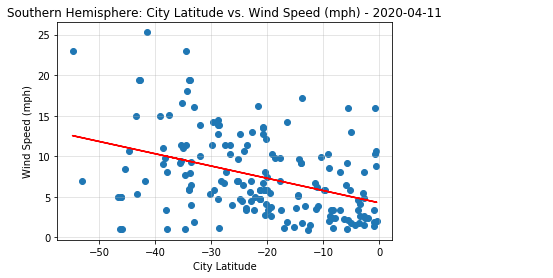

In [44]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind_speed"]
y_axis_label = "Wind Speed (mph)"
hemisphere = "Southern"

lin_regress(x_values, y_values, y_axis_label, hemisphere)

plt.savefig("data_output/Images/North_Lat_vs_WindSpeed_LinRegress.png")
plt.show()

# Based on the linear regression plot below, there is a weak inverse correlation between city latitude and wind speed in the southern hemisphere